In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [39]:
data = pd.read_csv('Preprocessing/190321067.csv', names=['Datetime', 'Logger','Something', 'Instrument', 'Air_Temp', 'Cr_Ap'])
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [42]:
aug22_data = data[data.Datetime > '2022-01-01']

aug22_data.reset_index(inplace=True)
aug22_data = aug22_data.drop(['Logger', 'Something', 'Instrument', 'index'], axis=1)

aug22_data['Cr_disp'] = aug22_data.Cr_Ap.diff()
aug22_data['Cr_sum_disp'] = aug22_data.Cr_disp.cumsum()

aug22_data.dropna(inplace=True)

#aug22_data['Air_Temp'] = aug22_data['Air_Temp'].apply(lambda x: int(re.sub('\D', '', x))/10)
aug22_data

,Datetime,Air_Temp,Cr_Ap,Cr_disp,Cr_sum_disp
1,2022-03-23 17:00:00,24.5,5242,-1.0,-1.0
2,2022-03-23 18:00:00,24.5,5242,0.0,-1.0
3,2022-03-23 19:00:00,24.5,5241,-1.0,-2.0
4,2022-03-23 23:00:00,24.3,5240,-1.0,-3.0
5,2022-03-24 00:00:00,24.3,5241,1.0,-2.0
...,...,...,...,...,...
8623,2022-06-16 02:44:00,30.0,5034,1.0,-209.0
8624,2022-06-16 02:54:00,29.9,5033,-1.0,-210.0
8625,2022-06-16 03:24:00,29.9,5033,0.0,-210.0
8626,2022-06-16 03:34:00,29.9,5033,0.0,-210.0


In [43]:
aug22_data.to_csv('ext1_aug22.csv')

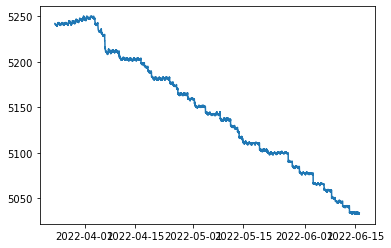

In [44]:
plt.plot(aug22_data.Datetime, aug22_data.Cr_Ap)